Create a Jupyter Notebook. Import the necessary modules.

In [1]:
from fasma.core import file_compressor as fc
from fasma.core import df_filters as dff
from fasma.core import df_generators as dfg
from fasma.core import plotter

Let's parse the relevant file. This file contains both an excited state calculation and a population calculation.

In [2]:
box1 = fc.parse("data/water_td-rhf.log")

If your population calculation is separate from your excited state calculation, parse both files and run the merge command.

In [3]:
es_box = fc.parse("data/ammonia_casci.log")
pop_box = fc.parse("data/ammonia_casscf_pop.log")
box2 = fc.merge(es_box, pop_box)

To get an MO Transition Analysis, we need only an excited state calculation. If your box object has an excited state calculation, generate_mo_transition_analysis() will work.

In [4]:
mo_transition_analysis = box1.generate_mo_transition_analysis()

Total Sum is the summation of all electron contribution of all MOs for a specific excitation (all the MOs in a row summed up). Particle Sum is the summation of all negative electron contribution. Hole Sum is the summation of all positive electron contribution.

In [5]:
mo_transition_analysis

transition energy  oscillator strength  \
Starting State Ending State                                           
1              2                        9.5207               0.0061   
               3                       11.4765               0.0000   
               4                       11.8141               0.0829   
               5                       13.9051               0.1063   
               6                       16.1678               0.5087   
               7                       20.3331               0.2577   
               8                       33.3601               0.0091   
               9                       34.0771               0.0000   
               10                      35.2723               0.0430   
               11                      35.5184               0.1942   

                             rotatory strength (velocity)  \
Starting State Ending State                                 
1              2                                     90.0   
               3                                     90.0   
               4                                     90.0   
               5                                     90.0   
               6                                     90.0   
               7                                     90.0   
               8                                     90.0   
               9                                     90.0   
               10                                    90.0   
               11                                    90.0   

                             rotatory strength (length)  total sum  \
Starting State Ending State                                          
1              2                                    0.0        0.0   
               3                                    0.0        0.0   
               4                                    0.0        0.0   
               5                                    0.0        0.0   
               6                                    0.0        0.0   
               7                                    0.0        0.0   
               8                                    0.0        0.0   
               9                                    0.0        0.0   
               10                                   0.0        0.0   
               11                                   0.0        0.0   

                             particle sum  hole sum  AS MO 1   AS MO 2  \
Starting State Ending State                                              
1              2                 0.992218 -0.992218      0.0  0.000000   
               3                 0.981288 -0.981288      0.0  0.000000   
               4                 0.981849 -0.981849      0.0  0.000000   
               5                 0.970225 -0.970225      0.0  0.000000   
               6                 0.976280 -0.976280      0.0  0.000000   
               7                 0.976335 -0.976335      0.0  0.000000   
               8                 0.971925 -0.971925      0.0 -0.971925   
               9                 0.984289 -0.984289      0.0  0.000000   
               10                0.984044 -0.984044      0.0 -0.946055   
               11                0.974994 -0.974994      0.0  0.000000   

                              AS MO 3   AS MO 4   AS MO 5   AS MO 6   AS MO 7  \
Starting State Ending State                                                     
1              2             0.000000  0.000000 -0.992218  0.992218  0.000000   
               3             0.000000  0.000000 -0.981288  0.000000  0.981288   
               4             0.000000 -0.981849  0.000000  0.981849  0.000000   
               5             0.000000 -0.970225  0.000000  0.000000  0.970225   
               6            -0.976280  0.000000  0.000000  0.976280  0.000000   
               7            -0.976335  0.000000  0.000000  0.000000  0.976335   
               8             0.000000  0.000000  0.000000  0.9719

We can do an AO Transition Analysis since this file has both a population calculation and excited state calculation. Otherwise, generate_ao_transition_analysis() will not work.

In [6]:
ao_transition_analysis = box1.generate_ao_transition_analysis()

In [7]:
ao_transition_analysis

transition energy  \
Starting State Ending State Atom Number Atom Type Principal Quantum Number Subshell Atomic Orbital                      
1              2            1           O         1                        S        S                          9.5207   
                                                  2                        S        S                          9.5207   
                                                                           P        PX                         9.5207   
                                                                                    PY                         9.5207   
                                                                                    PZ                         9.5207   
...                                                                                                               ...   
               11           1           O         3                        P        PZ                        35.5184   
                            2           H         1                        S        S                         35.5184   
                                                  2                        S        S                         35.5184   
                            3           H         1                        S        S                         35.5184   
                                                  2                        S        S                         35.5184   

                                                                                                    oscillator strength  \
Starting State Ending State Atom Number Atom Type Principal Quantum Number Subshell Atomic Orbital                        
1              2            1           O         1                        S        S                            0.0061   
                                                  2                        S        S                            0.0061   
                                                                           P        PX                           0.0061   
                                                                                    PY                           0.0061   
                                                                                    PZ                           0.0061   
...                                                                                                                 ...   
               11           1           O         3                        P        PZ                           0.1942   
                            2           H         1                        S        S                            0.1942   
                                                  2                        S        S                            0.1942   
                            3           H         1                        S        S                            0.1942   
                                                  2                        S        S                            0.1942   

                                                                                                    rotatory strength (velocity)  \
Starting State Ending State Atom Number Atom Type Principal Quantum Number Subshell Atomic Orbital                                 
1              2            1           O         1                        S        S                                       90.0   
                                                  2                        S        S                                       90.0   
                                                                           P        PX                                      90.0   
                                                                                    PY                                      90.0   
                                                                                    PZ                                      90.0   
..

From this point on, we will be messing around with ao_transition_analysis. However, the following methods used will work for both types of transition analyses.

filter_transition_rows() can take in four parameters (a dataframe, an index list, an attributes list, and an energy_range tuple).
Valid options for the index list are "Atom Number", "Atom Type", "Principle Quantum Number", "Subshell", and "Atomic Orbital". Valid options for the attributes list are "transition energy", "oscillator strength", and rotary strength for TDDFT calculations. The options signify what rows will be kept and what information will be displayed for them.

In [8]:
dff.filter_transition_rows(ao_transition_analysis)

transition energy  oscillator strength  \
Starting State Ending State                                           
1              2                        9.5207               0.0061   
               3                       11.4765               0.0000   
               4                       11.8141               0.0829   
               5                       13.9051               0.1063   
               6                       16.1678               0.5087   
               7                       20.3331               0.2577   
               8                       33.3601               0.0091   
               9                       34.0771               0.0000   
               10                      35.2723               0.0430   
               11                      35.5184               0.1942   

                             total sum  particle sum  hole sum  AS MO 1  \
Starting State Ending State                                               
1              2              0.000018      1.023117 -1.023098      0.0   
               3              0.000016      0.981295 -0.981279      0.0   
               4             -0.000009      1.012425 -1.012434      0.0   
               5             -0.000011      0.970231 -0.970242      0.0   
               6              0.000015      1.006682 -1.006667      0.0   
               7              0.000013      0.976342 -0.976329      0.0   
               8              0.000033      1.002192 -1.002159      0.0   
               9              0.000013      0.984292 -0.984279      0.0   
               10             0.000029      0.984050 -0.984021      0.0   
               11             0.000005      0.974990 -0.974985      0.0   

                              AS MO 2   AS MO 3   AS MO 4   AS MO 5   AS MO 6  \
Starting State Ending State                                                     
1              2             0.000000  0.000000  0.000000 -0.992208  0.992226   
               3             0.000000  0.000000  0.000000 -0.981279  0.000000   
               4             0.000000  0.000000 -0.981866  0.000000  0.981857   
               5             0.000000  0.000000 -0.970242  0.000000  0.000000   
               6             0.000000 -0.976273  0.000000  0.000000  0.976288   
               7             0.000000 -0.976329  0.000000  0.000000  0.000000   
               8            -0.971900  0.000000  0.000000  0.000000  0.971933   
               9             0.000000  0.000000  0.000000 -0.984279  0.000000   
               10           -0.946031  0.000000 -0.037989  0.000000  0.000000   
               11            0.000000  0.000000  0.000000 -0.974985  0.000000   

                              AS MO 7   AS MO 8  AS MO 9  AS MO 10  AS MO 11  \
Starting State Ending State                                                    
1              2             0.000000  0.000000  0.00000       0.0       0.0   
               3             0.981295  0.000000  0.00000       0.0       0.0   
               4             0.000000  0.000000  0.00000       0.0       0.0   
               5             0.970231  0.000000  0.00000       0.0       0.0   
               6             0.000000  0.000000  0.00000       0.0       0.0   
               7             0.976342  0.000000  0.00000       0.0       0.0   
               8             0.000000  0.000000  0.00000       0.0       0.0   
               9             0.000000  0.984292  0.00000       0.0       0.0   
               10            0.946061  0.037989  0.00000       0.0       0.0   
               11            0.000000  0.000000  0.97499       0.0       0.0   

                             AS MO 12  AS MO 13  
Starting State Ending State                      
1              2                  0.0       0.0  
               3                  0.0       0.0  
               4                  0.0       0.0  
               5                  0.0       0.0  
               6                  0.0    

Notice if we left the index list to be blank, our resulting dataframe is the same as the MO transition analysis (with slight rounding differences).

In [9]:
subshell_df = dff.filter_transition_rows(ao_transition_analysis, ["Atom Type", "Subshell"])

In [10]:
subshell_df

transition energy  \
Starting State Ending State Atom Type Subshell                      
1              2            O         S                    9.5207   
                                      P                    9.5207   
                            H         S                    9.5207   
               3            O         S                   11.4765   
                                      P                   11.4765   
                            H         S                   11.4765   
               4            O         S                   11.8141   
                                      P                   11.8141   
                            H         S                   11.8141   
               5            O         S                   13.9051   
                                      P                   13.9051   
                            H         S                   13.9051   
               6            O         S                   16.1678   
                                      P                   16.1678   
                            H         S                   16.1678   
               7            O         S                   20.3331   
                                      P                   20.3331   
                            H         S                   20.3331   
               8            O         S                   33.3601   
                                      P                   33.3601   
                            H         S                   33.3601   
               9            O         S                   34.0771   
                                      P                   34.0771   
                            H         S                   34.0771   
               10           O         S                   35.2723   
                                      P                   35.2723   
                            H         S                   35.2723   
               11           O         S                   35.5184   
                                      P                   35.5184   
                            H         S                   35.5184   

                                                oscillator strength  \
Starting State Ending State Atom Type Subshell                        
1              2            O         S                      0.0061   
                                      P                      0.0061   
                            H         S                      0.0061   
               3            O         S                      0.0000   
                                      P                      0.0000   
                            H         S                      0.0000   
               4            O         S                      0.0829   
                                      P                      0.0829   
                            H         S                      0.0829   
               5            O         S                      0.1063   
                                      P                      0.1063   
                            H         S                      0.1063   
               6            O         S                      0.5087   
                                      P                      0.5087   
                            H         S                      0.5087   
               7            O         S                      0.2577   
                                      P                      0.2577   
                            H         S                      0.2577   
               8            O         S                      0.0091   
                                      P                      0.0091   
                            H         S                      0.0091   
               9            O         S                      0.0000   
                                      P                      0.0000   
                            H         S                      0.0

By default, the attributes list contains only "transition energy" and "oscillator strength". Let's see the energy range filter in action.

In [11]:
filtered_df = dff.filter_transition_rows(ao_transition_analysis, ["Atom Type", "Subshell"], energy_range=(16, 30))

Just like with our MO analysis dataframes, we can also use show_nonzero_mo() to get a quick summary of interesting MOs for each row (excitation).

In [12]:
nonzero = dff.show_nonzero_mo(filtered_df)

In [13]:
nonzero

transition energy  \
Starting State Ending State Atom Type Subshell                      
1              6            O         S                   16.1678   
                                      P                   16.1678   
                            H         S                   16.1678   
               7            O         S                   20.3331   
                                      P                   20.3331   
                            H         S                   20.3331   

                                                oscillator strength  \
Starting State Ending State Atom Type Subshell                        
1              6            O         S                      0.5087   
                                      P                      0.5087   
                            H         S                      0.5087   
               7            O         S                      0.2577   
                                      P                      0.2577   
                            H         S                      0.2577   

                                                total sum  particle sum  \
Starting State Ending State Atom Type Subshell                            
1              6            O         S         -0.019396      0.010998   
                                      P         -0.502928      0.090725   
                            H         S          0.522339      0.904959   
               7            O         S          0.000000      0.000000   
                                      P         -0.412591      0.181095   
                            H         S          0.412604      0.795246   

                                                hole sum        non-zero MOs  \
Starting State Ending State Atom Type Subshell                                 
1              6            O         S        -0.030394           [AS MO 6]   
                                      P        -0.593652  [AS MO 3, AS MO 6]   
                            H         S        -0.382621  [AS MO 3, AS MO 6]   
               7            O         S         0.000000                  []   
                                      P        -0.593686  [AS MO 3, AS MO 7]   
                            H         S        -0.382643  [AS MO 3, AS MO 7]   

                                                AS MO 1  AS MO 2   AS MO 3  \
Starting State Ending State Atom Type Subshell                               
1              6            O         S             0.0      0.0  0.000000   
                                      P             0.0      0.0 -0.593652   
                            H         S             0.0      0.0 -0.382621   
               7            O         S             0.0      0.0  0.000000   
                                      P             0.0      0.0 -0.593686   
                            H         S             0.0      0.0 -0.382643   

                                                AS MO 4  AS MO 5   AS MO 6  \
Starting State Ending State Atom Type Subshell                               
1              6            O         S             0.0      0.0 -0.019396   
                                      P             0.0      0.0  0.090725   
                            H         S             0.0      0.0  0.904959   
               7            O         S             0.0      0.0  0.000000   
                                      P             0.0      0.0  0.000000   
                            H         S             0.0      0.0  0.000000   

                                                 AS MO 7  AS MO 8  AS MO 9  \
Starting State Ending State Atom Type Subshell                               
1              6            O         S         0.000000      0.0      0.0   
                                      P         0.000000      0.0      0.0   
                            H         S         0.000000      0.0      0.0   
               7            O         S     

We can call get_nonzero_mo() which returns a list of MOs had non-zero values in any of the rows. This is helpful when narrowing down a specific section of the dataframe and seeing which MOs are active in transitions within that specific region.

In [14]:
nonzero_list = dff.get_nonzero_mo(nonzero)

In [15]:
nonzero_list

[3, 6, 7]

We can see the power of our filtering functions. Because we cared only about the transitions from 16 to 30 ev, we have no need for all 13 MOs. We filtered down to only the MOs we need to make data analysis easier.

In [16]:
dff.filter_transition_columns(filtered_df, nonzero_list, box1.basic_data)

transition energy  \
Starting State Ending State Atom Type Subshell                      
1              6            O         S                   16.1678   
                                      P                   16.1678   
                            H         S                   16.1678   
               7            O         S                   20.3331   
                                      P                   20.3331   
                            H         S                   20.3331   

                                                oscillator strength  \
Starting State Ending State Atom Type Subshell                        
1              6            O         S                      0.5087   
                                      P                      0.5087   
                            H         S                      0.5087   
               7            O         S                      0.2577   
                                      P                      0.2577   
                            H         S                      0.2577   

                                                total sum  particle sum  \
Starting State Ending State Atom Type Subshell                            
1              6            O         S         -0.019396      0.010998   
                                      P         -0.502928      0.090725   
                            H         S          0.522339      0.904959   
               7            O         S          0.000000      0.000000   
                                      P         -0.412591      0.181095   
                            H         S          0.412604      0.795246   

                                                hole sum  core   AS MO 3  \
Starting State Ending State Atom Type Subshell                             
1              6            O         S        -0.030394   0.0  0.000000   
                                      P        -0.593652   0.0 -0.593652   
                            H         S        -0.382621   0.0 -0.382621   
               7            O         S         0.000000   0.0  0.000000   
                                      P        -0.593686   0.0 -0.593686   
                            H         S        -0.382643   0.0 -0.382643   

                                                 AS MO 6   AS MO 7  valence  
Starting State Ending State Atom Type Subshell                               
1              6            O         S        -0.019396  0.000000      0.0  
                                      P         0.090725  0.000000      0.0  
                            H         S         0.904959  0.000000      0.0  
               7            O         S         0.000000  0.000000      0.0  
                                      P         0.000000  0.181095      0.0  
                            H         S         0.000000  0.795246      0.0

filter_transition_columns() takes three arguments (a dataframe, a list of MOs, and the basic_data field of the currently analyzed box). We can still use it without the above nonzero functions. The contributions of MOs not included in the MO list is summed into the core and valence columns respectively where core MOs are the MOs up to the HOMO MO and valence MOs are the MOs above the HOMO MO.

In [17]:
dff.filter_transition_columns(subshell_df, [4,5,6,9], box1.basic_data)

transition energy  \
Starting State Ending State Atom Type Subshell                      
1              2            O         S                    9.5207   
                                      P                    9.5207   
                            H         S                    9.5207   
               3            O         S                   11.4765   
                                      P                   11.4765   
                            H         S                   11.4765   
               4            O         S                   11.8141   
                                      P                   11.8141   
                            H         S                   11.8141   
               5            O         S                   13.9051   
                                      P                   13.9051   
                            H         S                   13.9051   
               6            O         S                   16.1678   
                                      P                   16.1678   
                            H         S                   16.1678   
               7            O         S                   20.3331   
                                      P                   20.3331   
                            H         S                   20.3331   
               8            O         S                   33.3601   
                                      P                   33.3601   
                            H         S                   33.3601   
               9            O         S                   34.0771   
                                      P                   34.0771   
                            H         S                   34.0771   
               10           O         S                   35.2723   
                                      P                   35.2723   
                            H         S                   35.2723   
               11           O         S                   35.5184   
                                      P                   35.5184   
                            H         S                   35.5184   

                                                oscillator strength  \
Starting State Ending State Atom Type Subshell                        
1              2            O         S                      0.0061   
                                      P                      0.0061   
                            H         S                      0.0061   
               3            O         S                      0.0000   
                                      P                      0.0000   
                            H         S                      0.0000   
               4            O         S                      0.0829   
                                      P                      0.0829   
                            H         S                      0.0829   
               5            O         S                      0.1063   
                                      P                      0.1063   
                            H         S                      0.1063   
               6            O         S                      0.5087   
                                      P                      0.5087   
                            H         S                      0.5087   
               7            O         S                      0.2577   
                                      P                      0.2577   
                            H         S                      0.2577   
               8            O         S                      0.0091   
                                      P                      0.0091   
                            H         S                      0.0091   
               9            O         S                      0.0000   
                                      P                      0.0000   
                            H         S                      0.0

If instead of passing in a list of MOs to filter_transition_columns, we passed in a dictionary of key-values of strings to list of MOs, we can combine MOs into custom columns. Any MO not mentioned in the dictionary would still be assigned to core and valence columns as explained above.

In [18]:
custom_mo_dict = {"MOs 123" : [1, 2, 3], "MO 4" : [4]}

In [19]:
dff.filter_transition_columns(subshell_df, custom_mo_dict, box1.basic_data)

transition energy  \
Starting State Ending State Atom Type Subshell                      
1              2            O         S                    9.5207   
                                      P                    9.5207   
                            H         S                    9.5207   
               3            O         S                   11.4765   
                                      P                   11.4765   
                            H         S                   11.4765   
               4            O         S                   11.8141   
                                      P                   11.8141   
                            H         S                   11.8141   
               5            O         S                   13.9051   
                                      P                   13.9051   
                            H         S                   13.9051   
               6            O         S                   16.1678   
                                      P                   16.1678   
                            H         S                   16.1678   
               7            O         S                   20.3331   
                                      P                   20.3331   
                            H         S                   20.3331   
               8            O         S                   33.3601   
                                      P                   33.3601   
                            H         S                   33.3601   
               9            O         S                   34.0771   
                                      P                   34.0771   
                            H         S                   34.0771   
               10           O         S                   35.2723   
                                      P                   35.2723   
                            H         S                   35.2723   
               11           O         S                   35.5184   
                                      P                   35.5184   
                            H         S                   35.5184   

                                                oscillator strength  \
Starting State Ending State Atom Type Subshell                        
1              2            O         S                      0.0061   
                                      P                      0.0061   
                            H         S                      0.0061   
               3            O         S                      0.0000   
                                      P                      0.0000   
                            H         S                      0.0000   
               4            O         S                      0.0829   
                                      P                      0.0829   
                            H         S                      0.0829   
               5            O         S                      0.1063   
                                      P                      0.1063   
                            H         S                      0.1063   
               6            O         S                      0.5087   
                                      P                      0.5087   
                            H         S                      0.5087   
               7            O         S                      0.2577   
                                      P                      0.2577   
                            H         S                      0.2577   
               8            O         S                      0.0091   
                                      P                      0.0091   
                            H         S                      0.0091   
               9            O         S                      0.0000   
                                      P                      0.0000   
                            H         S                      0.0

You can still apply show_nonzero_mo() to any dataframe with custom MO columns, however, get_nonzero_mo() will not work.

We want to be able to plot all these excitations and their various breakdowns into usable spectra. This can be done by applying get_plotting_dataframe() and passing in four parameters (dataframe, the label of column containing the y-value of your spectra, a boolean for state_breakdown, and a boolean for mo_breakdown). By default, the boolean options are false.

In [20]:
dfg.get_plotting_dataframe(subshell_df)

transition energy  \
Atom Type Subshell                                                      
O         S         [9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...   
          P         [9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...   
H         S         [9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...   

                                                            total sum  
Atom Type Subshell                                                     
O         S         [-0.00012024892193644622, -0.01011288093260998...  
          P         [-0.005490012990989657, -0.05682726074034736, ...  
H         S         [0.005610374034304833, 0.06693939825392428, 0....

A state breakdown makes no difference here as this is a TDDFT calculation, but for MCSCF methods where there are multiple degenerate ground states, state breakdown will keep excitations in separate groups based on their ground state.

In [21]:
dfg.get_plotting_dataframe(subshell_df, state_breakdown=True)

transition energy  \
Starting State Atom Type Subshell                                                      
1              O         S         [9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...   
                         P         [9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...   
               H         S         [9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...   

                                                                           total sum  
Starting State Atom Type Subshell                                                     
1              O         S         [-0.00012024892193644622, -0.01011288093260998...  
                         P         [-0.005490012990989657, -0.05682726074034736, ...  
               H         S         [0.005610374034304833, 0.06693939825392428, 0....

The MO breakdown option is more usable here.

In [22]:
dfg.get_plotting_dataframe(subshell_df, mo_breakdown=True)

transition energy  \
Atom Type Subshell                                                      
O         S         [9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...   
          P         [9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...   
H         S         [9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...   

                                                     AS MO 1  \
Atom Type Subshell                                             
O         S         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
          P         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
H         S         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                                              AS MO 2  \
Atom Type Subshell                                                      
O         S         [0.0, 0.0, 0.0, 0.0, 0.0, -0.00739742494651651...   
          P         [0.0, 0.0, 0.0, 0.0, 0.0, -0.00027524668257993...   
H         S         [0.0, 0.0, 0.0, 0.0, 0.0, -0.00117162194242982...   

                                                              AS MO 3  \
Atom Type Subshell                                                      
O         S                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
          P         [0.0, 0.0, 0.0, -0.3019909166797161, -0.152992...   
H         S         [0.0, 0.0, 0.0, -0.19463928259760663, -0.09860...   

                                                              AS MO 4  \
Atom Type Subshell                                                      
O         S         [0.0, -0.00849575627702068, -0.010764859627204...   
          P         [0.0, -0.06439123260230571, -0.081589273230606...   
H         S         [0.0, -0.00850971207362993, -0.010782542831216...   

                                                              AS MO 5  \
Atom Type Subshell                                                      
O         S                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
          P         [-0.0060524677521698635, 0.0, 0.0, 0.0, 0.0, 0...   
H         S                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                                              AS MO 6  \
Atom Type Subshell                                                      
O         S         [-0.00012024892193644622, -0.00161712465558930...   
          P         [0.0005624547611802057, 0.007563971861958349, ...   
H         S         [0.005610374034304833, 0.0754491103275542, 0.0...   

                                                              AS MO 7  \
Atom Type Subshell                                                      
O         S                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
          P         [0.0, 0.0, 0.01912994554359564, 0.0, 0.0466682...   
H         S         [0.0, 0.0, 0.08400558296942322, 0.0, 0.2049349...   

                                                              AS MO 8  \
Atom Type Subshell                                                      
O         S                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
          P         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001937442815...   
H         S         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0014397752164...   

                                                              AS MO 9  \
Atom Type Subshell                                                      
O         S         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00370919...   
          P         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01216520...   
H         S         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17346862...   

                                                    AS MO 10  \
Atom Type Subshell                                             
O         S         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
          P         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
H         S         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   

                                                    AS MO 11  \
Atom Type Subshell                                  

If one just wanted the absorption spectra in its entirety, one should just pass in the mo transition analysis directly without changing the boolean options.

In [23]:
dfg.get_plotting_dataframe(mo_transition_analysis)

,transition energy,oscillator strength
0,"[9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...","[0.0061, 0.0829, 0.1063, 0.5087, 0.2577, 0.009..."


And if one wanted to break the basic absorption spectra down by MOs, they can do this.

In [24]:
dfg.get_plotting_dataframe(mo_transition_analysis, mo_breakdown=True)

,transition energy,AS MO 1,AS MO 2,AS MO 3,AS MO 4,AS MO 5,AS MO 6,AS MO 7,AS MO 8,AS MO 9,AS MO 10,AS MO 11,AS MO 12,AS MO 13
0,"[9.5207, 11.8141, 13.9051, 16.1678, 20.3331, 3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, -0.00884451480822, -...","[0.0, 0.0, 0.0, -0.49663340087886004, -0.25160...","[0.0, -0.08139527142247999, -0.103134864350000...","[-0.006052528854500001, 0.0, 0.0, 0.0, 0.0, 0....","[0.006052528854500001, 0.08139527142247999, 0....","[0.0, 0.0, 0.10313486435000001, 0.0, 0.2516016...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0016335143064...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18934391...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


These dataframe make it easy for us to see our spectra breakdown. But to actually use them in plotting functions, we need to call get_spectra_dict which takes three arguments (dataframe, spectra name, and a boolean for keeping spectra with all zero y values). Each key has a Spectrum object which has a transition energy numpy array and a corresponding array of the chosen roots.

In [25]:
subshell_breakdown_dict = dfg.get_spectra_dict(dfg.get_plotting_dataframe(subshell_df))

In [26]:
subshell_breakdown_dict.keys()

dict_keys(['O S', 'O P', 'H S'])

The spectra name by default is an empty string. It is useful for defining a name for the key-value of the absorption spectra.

In [27]:
absorption_dict = dfg.get_spectra_dict(dfg.get_plotting_dataframe(mo_transition_analysis), spectra_name="Water")

In [28]:
absorption_dict.keys()

dict_keys(['Water'])

However, it can still be used for other breakdowns too by simply adding the string in front of the default labels.

In [29]:
dfg.get_spectra_dict(dfg.get_plotting_dataframe(subshell_df), spectra_name="Water").keys()

dict_keys(['Water O S', 'Water O P', 'Water H S'])

Before plotting, we need to broaden each Spectrum object by calling gen_spect_batch. You can modify the broadening value, the resolution, add an x-axis shift, provide an energy limit on what is broadened, and choose the broadening method. By default, broadening parameter is 0.5, the energy limit doesn't exist, the resolution is 100, the xshift is 0, and the broadening method is lorentzian.

In [30]:
plotter.gen_spect_batch(subshell_breakdown_dict)

Spectral range not specified... Automatically generating spectral range
Spectral range not specified... Automatically generating spectral range
Spectral range not specified... Automatically generating spectral range


In [31]:
plotter.gen_spect_batch(absorption_dict)

Spectral range not specified... Automatically generating spectral range


Let's plot them individually. There are already default labels for the axis, but they can be modified. By default, the x-axis for energy is in ev but ev, nm, wn, and eh units are supported. If no title is given, the plot will have no title.

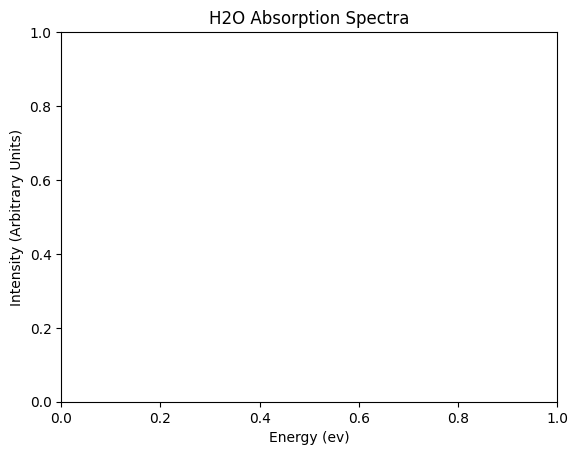

In [32]:
abs_fig, abs_axis = plotter.define_axis(title="H2O Absorption Spectra")

In [33]:
plotter.plot(ax=abs_axis, spectra=absorption_dict, )

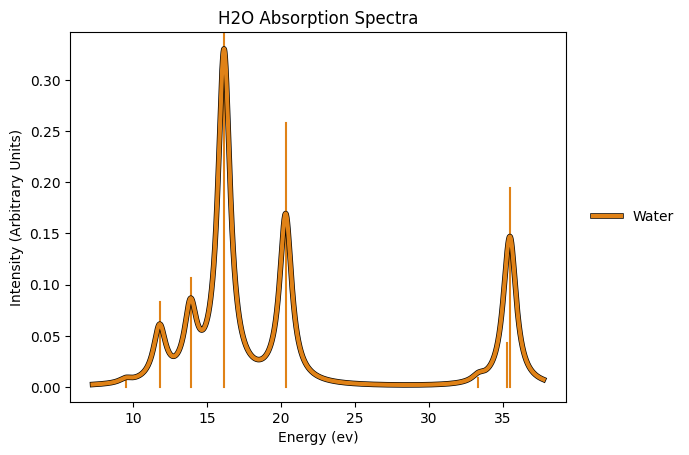

In [34]:
abs_fig

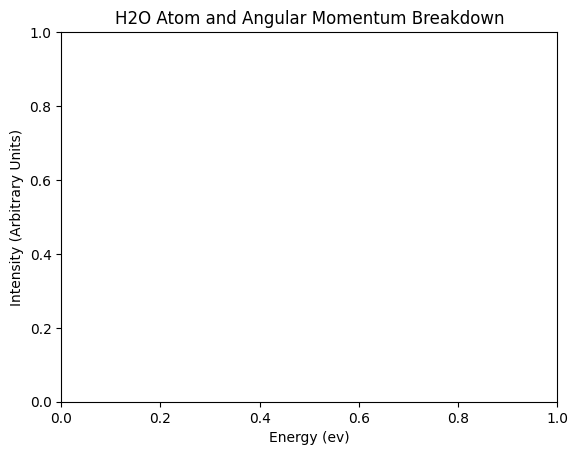

In [35]:
subshell_fig, subshell_axis = plotter.define_axis(title="H2O Atom and Angular Momentum Breakdown")

In [36]:
plotter.plot(ax=subshell_axis, spectra=subshell_breakdown_dict)

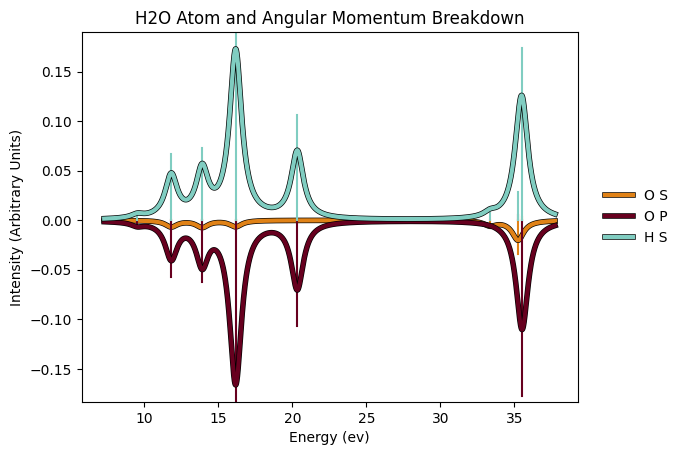

In [37]:
subshell_fig

One can specify an energy range they interested.

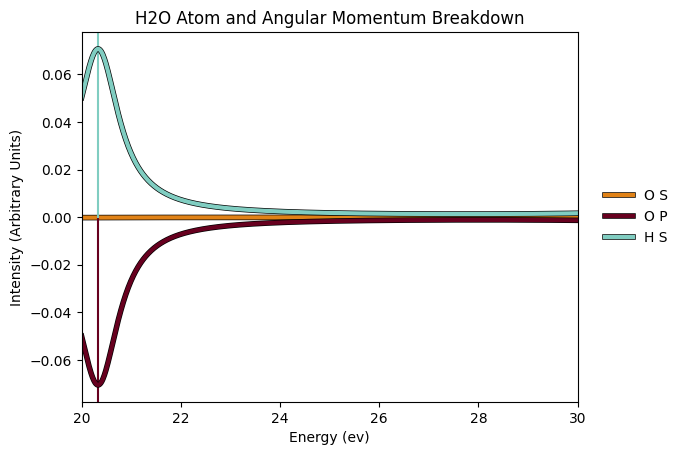

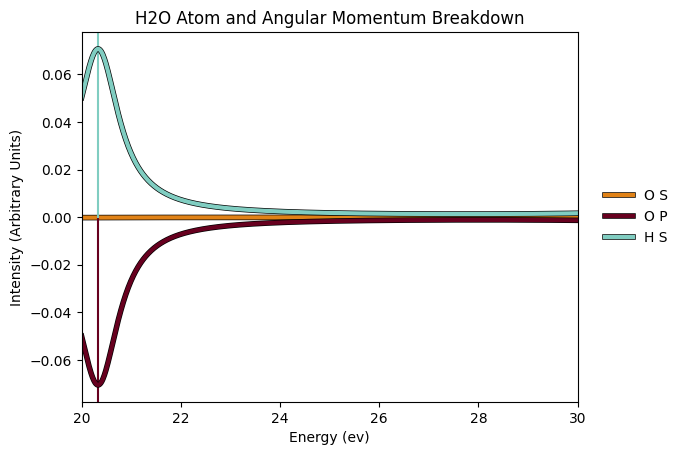

In [38]:
subshell_fig, subshell_axis = plotter.define_axis(title="H2O Atom and Angular Momentum Breakdown")
plotter.plot(ax=subshell_axis, spectra=subshell_breakdown_dict, xlim=(20, 30))
subshell_fig

We can also limit the y-axis.

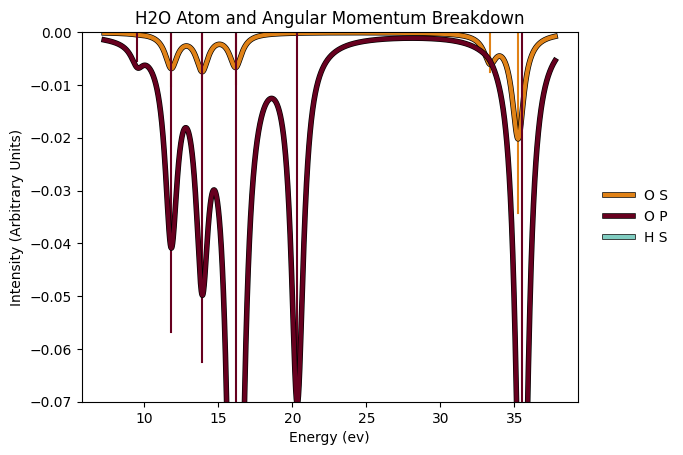

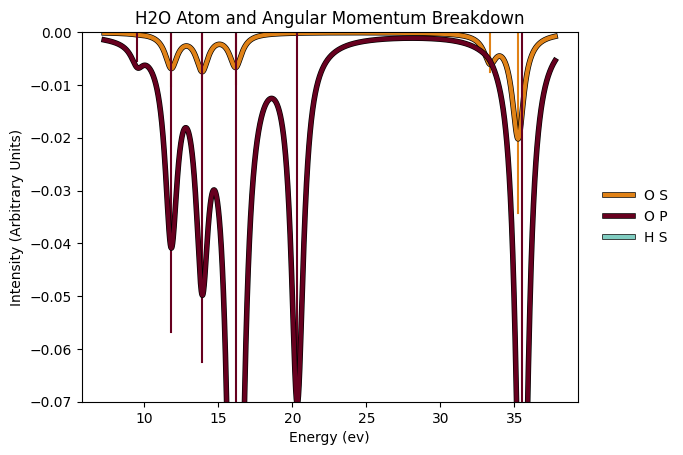

In [39]:
subshell_fig, subshell_axis = plotter.define_axis(title="H2O Atom and Angular Momentum Breakdown")
plotter.plot(ax=subshell_axis, spectra=subshell_breakdown_dict, ylim=(-0.07, 0))
subshell_fig

We can also plot this same graph as a 3D Projection.

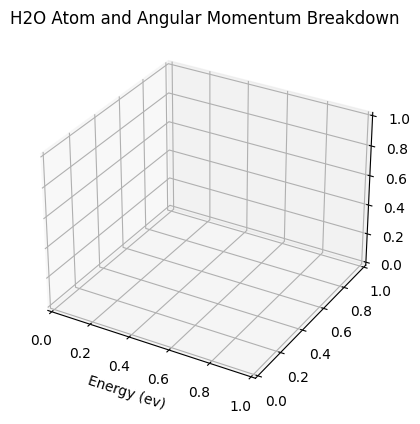

In [40]:
subshell_fig_3d, subshell_axis_3d = plotter.define_axis(title="H2O Atom and Angular Momentum Breakdown", waterfall=True)

In [41]:
plotter.plot(ax=subshell_axis_3d, spectra=subshell_breakdown_dict)

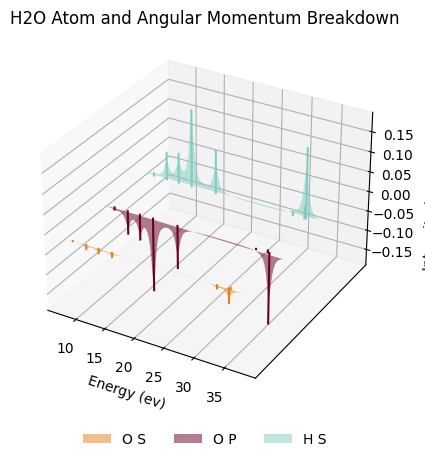

In [42]:
subshell_fig_3d

It may be useful to stack multiple plots onto one figure. Let's try with a 2D plot.

In [52]:
import matplotlib.pyplot as plt

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Water Absorbtion Spectra'}>)

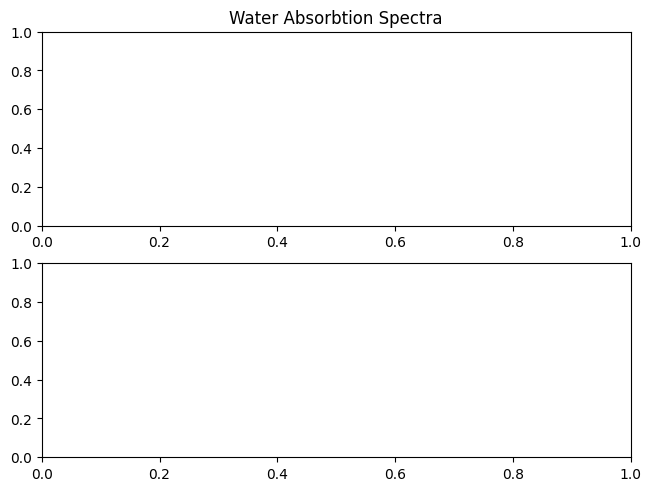

In [53]:
figure2d, axis2d = plt.subplots(2, 1, constrained_layout=True)
plotter.define_axis(title="Water Absorbtion Spectra", xlabel=None,ylabel=None, ax=axis2d[0])

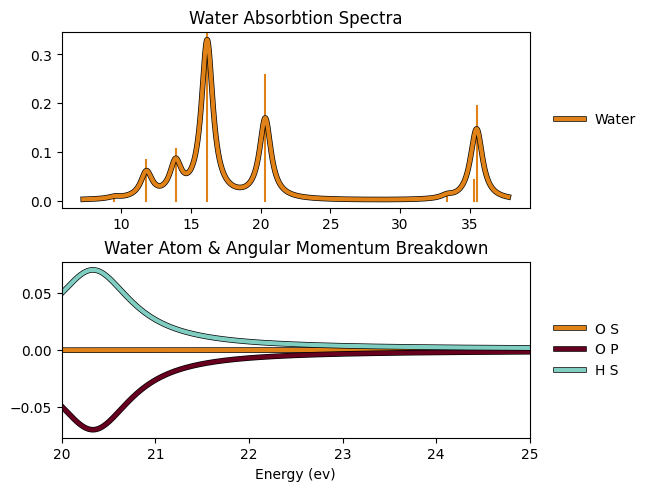

In [54]:
plotter.plot(spectra=absorption_dict, ax=axis2d[0], sticks=True, show=False)
plotter.define_axis(title="Water Atom & Angular Momentum Breakdown", ylabel=None, ax=axis2d[1])
plotter.plot(spectra=subshell_breakdown_dict, ax=axis2d[1], xlim=(20, 25), sticks=False, show=False)
figure2d

Let's do the same for a 3d projection.

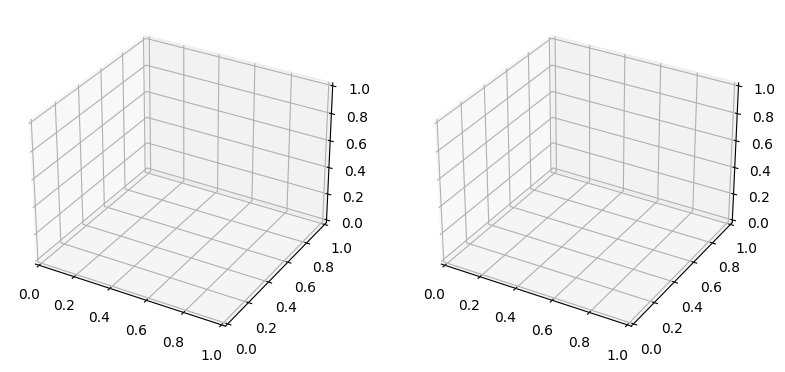

In [55]:
fig3d = plt.figure(figsize=plt.figaspect(0.5))
ax1 = fig3d.add_subplot(1, 2, 1, projection='3d')
ax2 = fig3d.add_subplot(1, 2, 2, projection='3d')

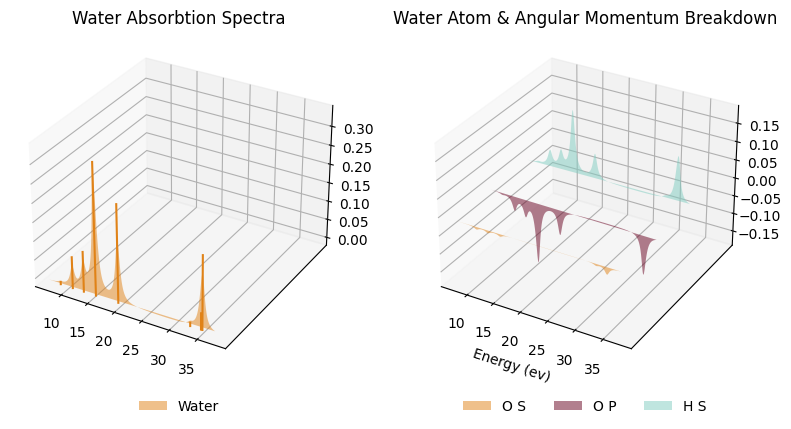

In [56]:
plotter.define_axis(title="Water Absorbtion Spectra", xlabel=None,ylabel=None, ax=ax1, waterfall=True)
plotter.plot(spectra=absorption_dict, ax=ax1, sticks=True, show=False)
plotter.define_axis(title="Water Atom & Angular Momentum Breakdown", ylabel=None, ax=ax2, waterfall=True)
plotter.plot(spectra=subshell_breakdown_dict, ax=ax2, sticks=False, show=False)
fig3d